<a href="https://colab.research.google.com/github/pondels/CSE450/blob/main/module4/Module_4_Nathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LeakyReLU, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




holdout = pd.read_csv('raisin-holdout.csv')
raisins = pd.read_csv('raisin-training.csv')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#tf.debugging.set_log_device_placement(True)

#Explore the data

In [2]:
raisins
raisins.describe()
raisins.info()
raisins["Class"].value_counts()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,97026,455.971591,273.053810,0.800869,99561,0.671205,1212.667,Kecimen
1,65253,418.997887,205.756185,0.871122,69700,0.666255,1075.404,Besni
2,113029,558.516156,265.284203,0.879996,116783,0.662092,1419.577,Besni
3,76792,338.857545,291.359202,0.510584,78842,0.772322,1042.770,Kecimen
4,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221,Kecimen
...,...,...,...,...,...,...,...,...
693,46742,303.555203,199.445933,0.753861,48077,0.705263,847.792,Kecimen
694,55787,333.703453,226.951208,0.733121,59520,0.688592,977.425,Kecimen
695,61996,333.747640,243.540245,0.683753,63641,0.673138,958.627,Kecimen
696,74728,355.310549,270.740897,0.647596,76287,0.766677,1048.675,Kecimen


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,88085.169054,431.939683,255.201211,0.780116,91567.237822,0.698135,1169.532176
std,38724.126965,117.041590,49.424258,0.092555,40718.359270,0.054863,276.135427
min,25387.000000,225.629541,144.618672,0.348730,26139.000000,0.379856,619.074000
25%,59549.000000,345.357797,220.925163,0.740331,61741.750000,0.669509,966.559250
50%,79019.500000,408.387738,247.777645,0.799332,81651.000000,0.705568,1121.973000
75%,105337.250000,496.804625,280.319168,0.844918,109174.500000,0.734484,1315.571500
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.830632,2697.753000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             698 non-null    int64  
 1   MajorAxisLength  698 non-null    float64
 2   MinorAxisLength  698 non-null    float64
 3   Eccentricity     698 non-null    float64
 4   ConvexArea       698 non-null    int64  
 5   Extent           698 non-null    float64
 6   Perimeter        698 non-null    float64
 7   Class            698 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 43.8+ KB


Kecimen    351
Besni      347
Name: Class, dtype: int64

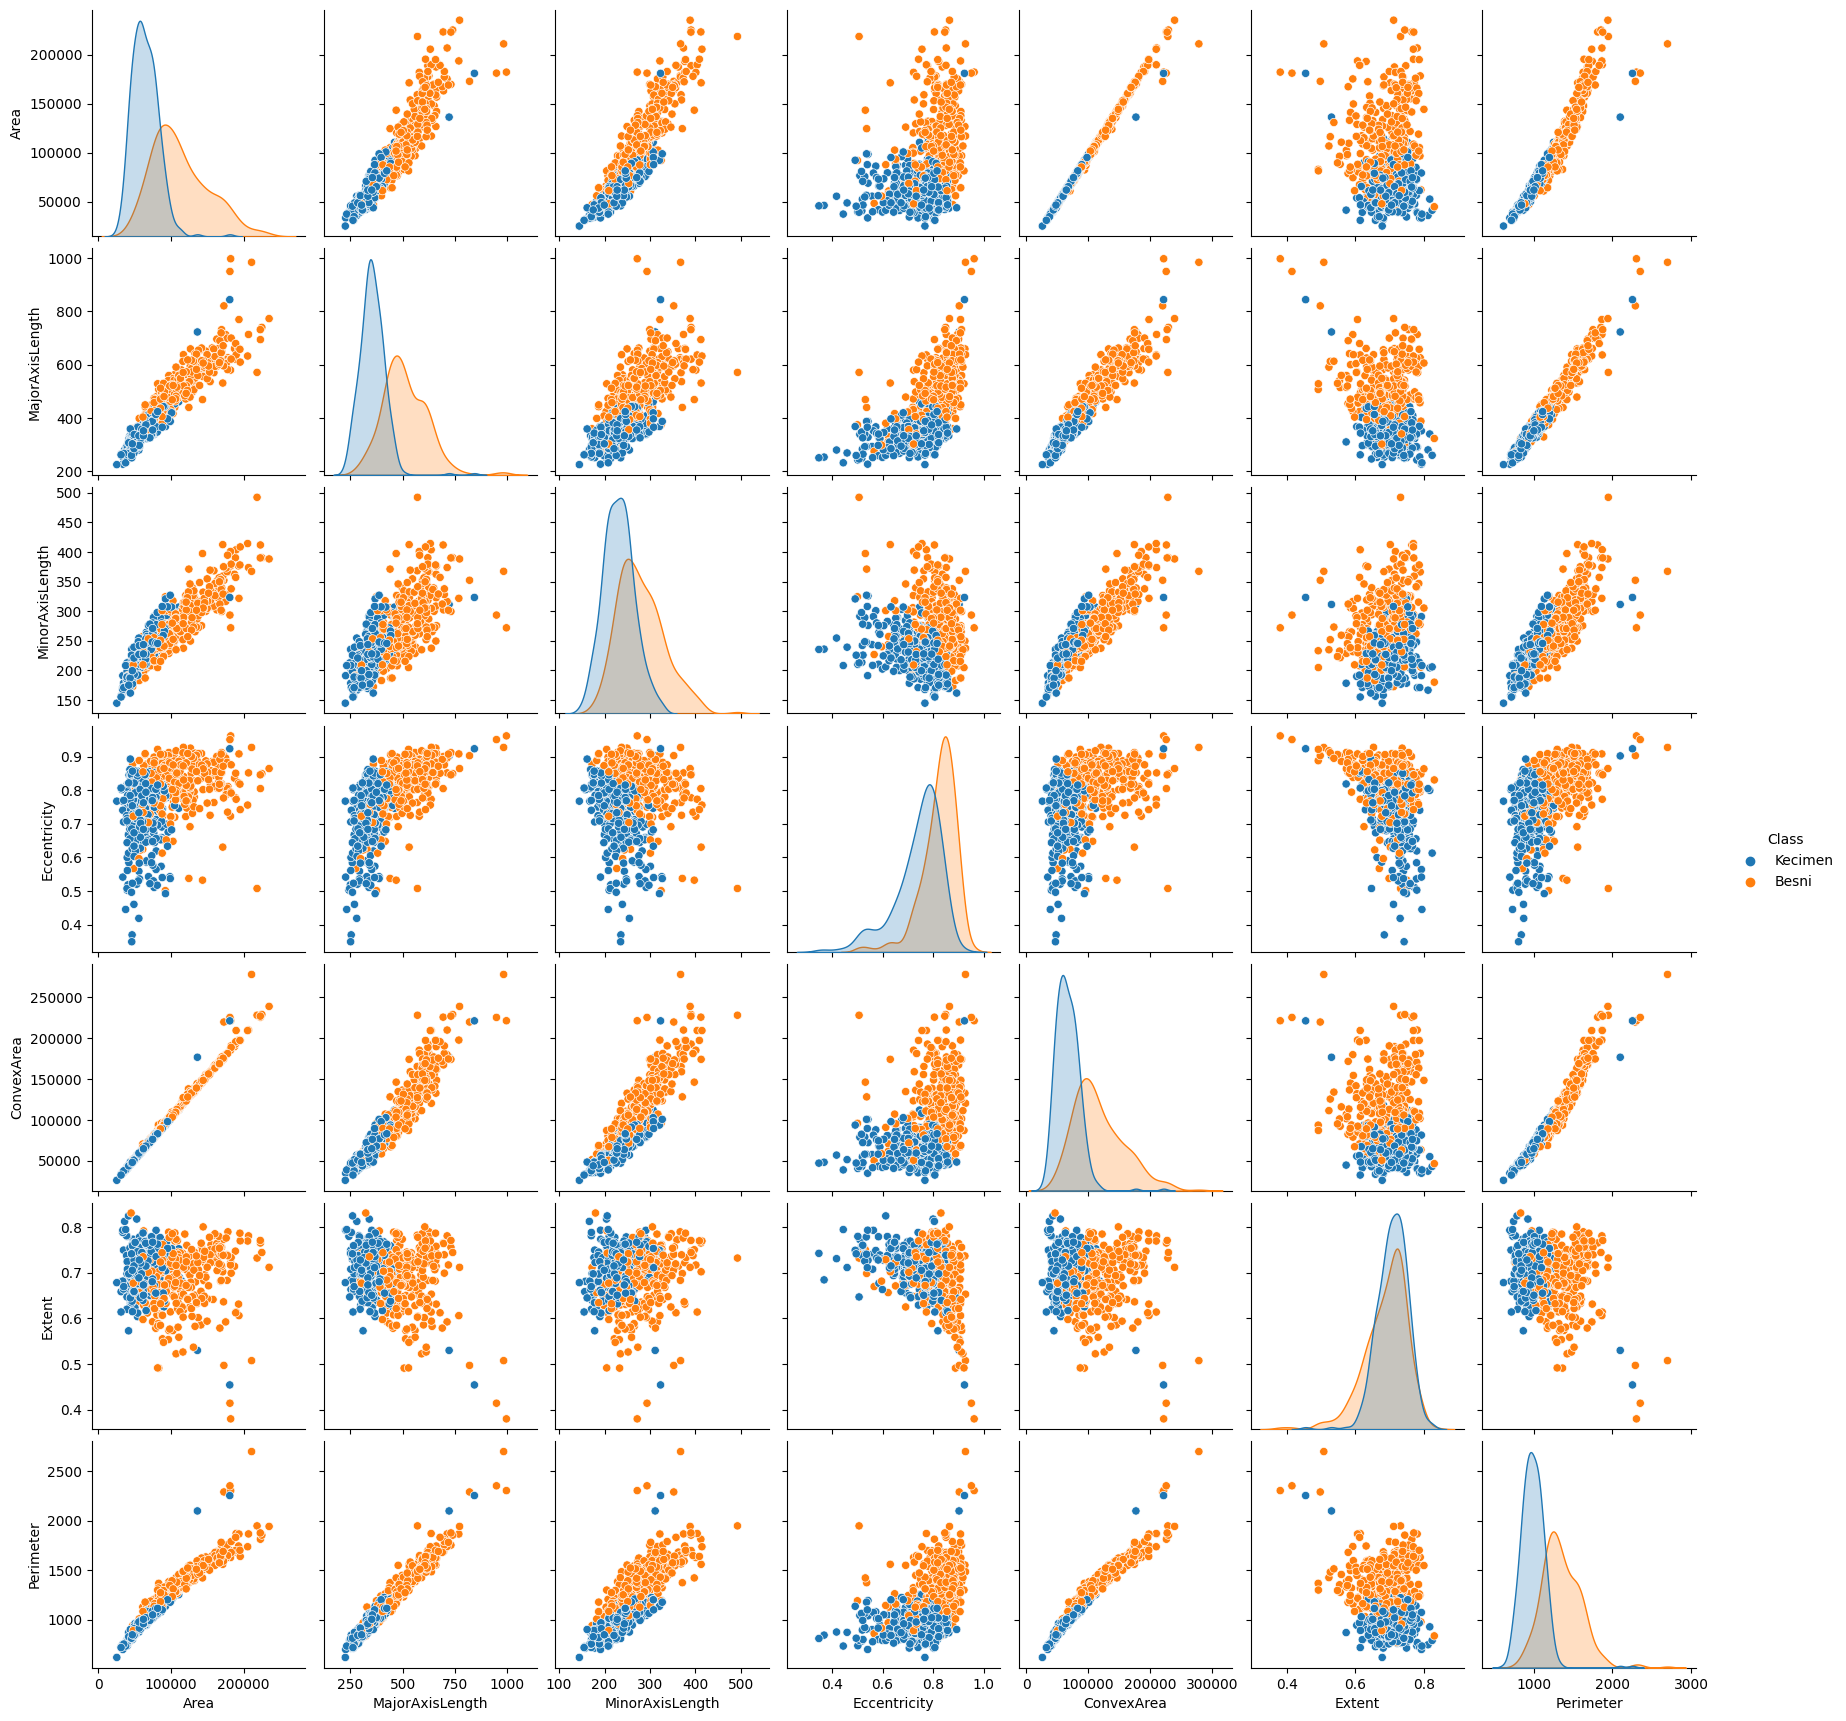

In [3]:
# raisins["total"] = raisins['casual'] + raisins['registered']
# sns.scatterplot(data= raisins, x = "hr", y = "registered")
# sns.scatterplot(data= raisins, x = "hr", y = "casual")
#sns.barplot(data= raisins, x = raisins.index, y = "total")

# sns.pairplot(raisins)

#over time registered casual total
sns.pairplot(raisins, hue= "Class")


#Visualize data

#preprocess/feature engineering? 
onehot



In [4]:
#cyclical https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning
def makeItCycle(df, column, period):
  df[column+'sin'] = np.sin(2 * np.pi * df[column]/period)
  df[column+'cos'] = np.cos(2 * np.pi * df[column]/period)
  return df.drop(columns=[column])
def preprocess(X, scaler, resetScaler = False):
  proc = pd.DataFrame(X,copy = True)
  # proc[["Class"]] = pd.get_dummies(proc["Class"], drop_first=True)
  if (resetScaler):
    scaler.fit(proc)
  proc = pd.DataFrame(scaler.transform(proc))
  return proc, scaler

# tempDf, tempScaler  = preprocess(raisins, MinMaxScaler(), True)

In [5]:

X, scaler = preprocess(raisins.drop(columns = ["Class"]), scaler=MinMaxScaler(), resetScaler= True)
y = X["class"]


import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


KeyError: 'class'

#Create model

In [ ]:

#run multiple times with different random states

def create_model(initializer='uniform', activation='selu', optimizer='adam', dropoutRate = 0.1):
    model = Sequential()
    if (activation == 'leakyRelu'): activation = LeakyReLU()
    model.add(Dense(128, input_dim=len(X_train.columns), activation=activation))
    model.add(Dropout(dropoutRate))
    model.add(Dense(256, activation=activation))
    model.add(Dropout(dropoutRate))
    model.add(Dense(1, activation="sigmoid"))
    opt = keras.optimizers.Adam()
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['binary_crossentropy'])
    return model

model = create_model()

# dtc = DecisionTreeClassifier(random_state = 11)
# dtc.fit(X_train, X_test)




In [ ]:
# param_grid = {
#     # 'initializer': ['glorot_uniform'],
#     # 'optimizer': ['adam'],
#     # 'numExtraLayers': [0],
#     # 'dropoutRate' : [0.1],
#     # 'batch_size': [24],
#     'epochs': [90, 120, 150],
# }


In [ ]:
# cv = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
# #grid_search = GridSearchCV(
#     estimator=KerasRegressor(create_model),
#     param_grid=param_grid,
#     cv=cv,
#     n_jobs = -1,
#     verbose = 0
# )
# todo fix
# early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
#reslts = grid_search.fit(X, y, batch_size = 24)
#grid_search.best_params_

# reslts = grid_search.fit(X, y, verbose=1, callbacks=[early_stop])
#GPU: 3 min 55
#cpu: 1:50#
# num jobs -1 cpu: 0:32.5
#best {'activation': 'selu', 'epochs': 60}
# {'activation': 'selu', 'batch_size': 24, 'epochs': 90}


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
#tf.device('/cpu:0')
#tf.device('/device:GPU:0')
y_train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000, batch_size=24, callbacks=[early_stop],shuffle=False)
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=24, callbacks=[early_stop],shuffle=False)
# history = model.fit(X_train, y_train, epochs=2000, batch_size=24,shuffle=False)
# history = model.fit(X_train, y_train, epochs=2000, verbose=0, validation_split = .2, batch_size=25,
#                     callbacks=[early_stop])

# hist = pd.DataFrame(history.history)

try:
    hist.drop(columns='index', inplace=True)
    hist = pd.concat([hist, pd.DataFrame(history.history)], axis = 0, ignore_index=True)


except NameError:
    hist = pd.DataFrame(history.history)

hist = hist.reset_index()

,7
357,0.0
647,0.0
291,0.0
420,1.0
177,1.0
...,...
71,1.0
106,0.0
270,0.0
435,0.0


Epoch 1/10000
21/21 [==============================] - 1s 10ms/step - loss: 0.5301 - binary_crossentropy: 0.5301 - val_loss: 0.3771 - val_binary_crossentropy: 0.3771
Epoch 2/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.4050 - binary_crossentropy: 0.4050 - val_loss: 0.3393 - val_binary_crossentropy: 0.3393
Epoch 3/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.3833 - binary_crossentropy: 0.3833 - val_loss: 0.3328 - val_binary_crossentropy: 0.3328
Epoch 4/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.3849 - binary_crossentropy: 0.3849 - val_loss: 0.3320 - val_binary_crossentropy: 0.3320
Epoch 5/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.3883 - binary_crossentropy: 0.3883 - val_loss: 0.3332 - val_binary_crossentropy: 0.3332
Epoch 6/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.3860 - binary_crossentropy: 0.3860 - val_loss: 0.3321 - val_binary_crossentropy: 0.3321
Epoch 7/1

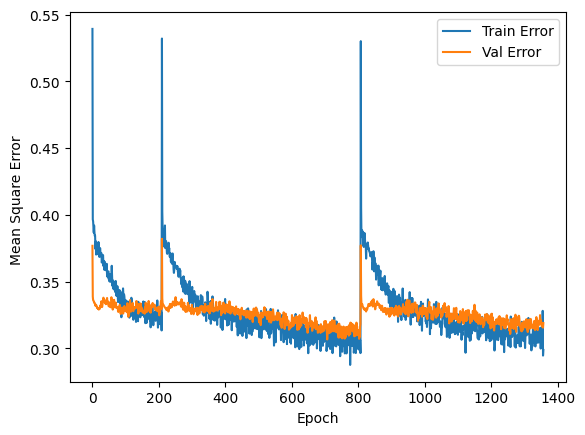

In [ ]:
def plot_history(error = 'loss'):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    # plt.plot(hist['index'], hist['loss'], label='Loss')
    plt.plot(hist['index'], hist[error], label='Train Error')
    plt.plot(hist['index'], hist['val_'+ error], label = 'Val Error')
    plt.legend()
    # plt.xlim([300,450])
    # plt.ylim([0,.18])

plot_history()
# plot_history(error='loss')


selu baseline epoch 194  
0.0031 - val_loss: 0.0079 - val_mse: 0.0079


relu epoch 80 loss: 0.0024 - mse: 0.0024 - val_loss: 0.0093 - val_mse: 0.0093

epoch 68 
541/541 [==============================] - 2s 4ms/step - loss: 1954.0997 - mse: 1954.0997 - val_loss: 7660.5137 - val_mse: 7660.5137



In [ ]:
from sklearn.metrics import recall_score, precision_score, plot_confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score

y_pred = np.round(model.predict(X_test), 0)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

recall, precision, f1, accuracy

7/7 [==============================] - 0s 2ms/step


(0.9035087719298246,
 0.8728813559322034,
 0.8879310344827587,
 0.8761904761904762)

In [ ]:
def predAndCsv(df, filename): 
    procDf, deleteme = preprocess(pd.DataFrame(data = df, copy=True), scaler=scaler)
    predictions = np.round(model.predict(procDf), 0)
    pd.DataFrame(predictions).clip(lower=0).to_csv(filename, index=False, header= "Class")
    return predictions
# debug_df = mini_df
# debug_df["predictions"] = predAndCsv(mini_df, "nathan-mini-predictions.csv")
predAndCsv(holdout, "nathan-holdout-predictions.csv")
# predAndCsv(mini_df, "team8-module4-predictions.csv")
# pd.DataFrame(debug_df).to_csv("debug2.csv", index=False)



7/7 [==============================] - 0s 1ms/step


array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],

#refine 

grid search

In [ ]:

# model.save('nathan-model')

In [ ]:
#grid search